# Speed test con python
Paso a Paso

In [10]:
#Primero Instalaremos las siguientes librerías
!pip install matplotlib
!pip install speedtest-cli

In [3]:
#Para conocer los datos de MB/s de subidas y bajadas es necesario hacer lo siguiente
import speedtest
import datetime
s = speedtest.Speedtest()
tiempo = datetime.datetime.now().strftime("%H:%M:%S")
bajada = round((round(s.download()) / 1048576), 2)
subida = round((round(s.upload()) / 1048576), 2)
print(f"tiempo: {tiempo}, bajada: {bajada} Mb/s, subida: {subida} Mb/s")


tiempo: 09:10:24, bajada: 48.3 Mb/s, subida: 14.68 Mb/s


# Para guardarlo en un .csv


In [4]:
import csv
s = speedtest.Speedtest()
x=0

with open('SpeedTest.csv', mode='w', newline='') as csv_file:
    fieldnames=['tiempo', 'bajada', 'subida']
    writer= csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    
    while x<8:
        tiempo = datetime.datetime.now().strftime("%H:%M:%S")
        bajada = round((round(s.download()) / 1048576), 2)
        subida = round((round(s.upload()) / 1048576), 2)
        
        writer.writerow({
            'tiempo': tiempo,
            'bajada': bajada,
            'subida': subida
        })
        x+=1

        

# Para graficarlo

In [30]:
#Importamos Librerias
import matplotlib.pyplot as plt
import csv

#Creamos arrays vacios
times = []
download = []
upload = [

In [31]:
#Abrimos archivo
with open('SpeedTest.csv', 'r') as csvfile:
     plots = csv.reader(csvfile, delimiter=',')
     next(csvfile)
    
#Rellenamos arrays
     for row in plots:
            times.append(str(row[0]))
            download.append(float(row[1]))
            upload.append(float(row[2]))
print(times, "\n", download, "\n", upload)

['09:16:25', '09:16:47', '09:17:08', '09:17:28', '09:17:49', '09:18:09', '09:18:30', '09:18:51'] 
 [48.04, 48.41, 48.61, 48.03, 47.83, 44.88, 48.04, 48.11] 
 [13.94, 15.77, 15.2, 14.21, 15.91, 14.43, 13.6, 14.29]


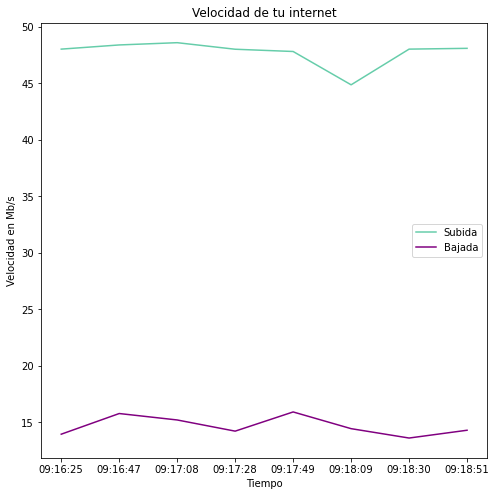

In [52]:
#Crearlo
plt.figure('speedtest',[8,8])
plt.plot(times, download, label='Subida', color='mediumaquamarine')
plt.plot(times, upload, label='Bajada', color='purple')

#Nombrar & Etiquetar
plt.xlabel('Tiempo')
plt.ylabel('Velocidad en Mb/s')
plt.title("Velocidad de tu internet")
plt.legend()

#Guardarlo
plt.savefig('test_graph2.jpg', bbox_inches='tight')

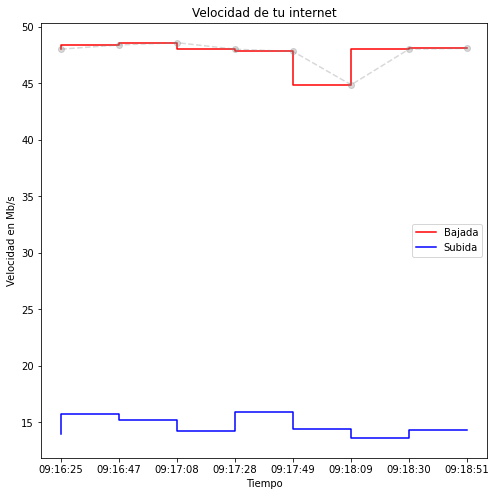

In [48]:
plt.figure('speedtest',[8,8])
#Bajada
plt.step(times, download, label='Bajada', color='r')

#Subida
plt.step(times, upload, label='Subida', color='b')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)

#Títulos & Etiquetas
plt.xlabel('Tiempo')
plt.ylabel('Velocidad en Mb/s')
plt.title("Velocidad de tu internet")
plt.legend()

#Guardarlo
plt.savefig('test_graph.jpg', bbox_inches='tight')